# Importando as Bibliotecas necessárias e carregando o Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import collections

In [2]:
df = pd.read_csv('df_athlete_events.csv')

In [3]:
df.set_index('Athlete_ID', inplace=True)

## Features do Dataset:
<ul>
<li>ID - Número de Identificação Único de cada atleta</li>
<li>Name - Nome do Atleta</li>
<li>Sex - Gênero do Atleta</li>
<li>Age - Idade</li>
<li>Height - Altura</li>
<li>Weight - Peso em KG</li>
<li>NOC - Nome do comitê olímpico ao qual o atleta pertence</li>
<li>Games - Ano e época dos jogos</li>
<li>Year - Ano da edição em que o atleta participou</li>
<li>Season - Estação na qual ocorreu os jogos</li>
<li>City - Cidade onde ocorreu a edição dos jogos</li>
<li>Sport - Esporte do atleta</li>
<li>Event - Especificação a respeito da categoria do esporte</li>
<li>Medal - Medalha ganha pelo atleta</li>
</ul>

# Observações Iniciais

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45567 entries, 4 to 135563
Data columns (total 14 columns):
Name      45567 non-null object
Sex       45567 non-null object
Age       44594 non-null float64
Height    35547 non-null float64
Weight    34926 non-null object
Team      45567 non-null object
NOC       45567 non-null object
Games     45567 non-null object
Year      45567 non-null int64
Season    45567 non-null object
City      45567 non-null object
Sport     45567 non-null object
Event     45567 non-null object
Medal     39804 non-null object
dtypes: float64(2), int64(1), object(11)
memory usage: 5.2+ MB


# Limpando os dados

## Removendo dados duplicados

In [5]:
df.drop_duplicates(inplace = True)

## Dados Categóricos

### Entendendo a estrutura desses dados

In [6]:
df.describe(include=['object'])

,Name,Sex,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal
count,45554,45554,34926,45554,45554,45554,45554,45554,45554,45554,39793
unique,32905,6,188,602,201,51,5,43,66,760,4
top,"Michael Fred Phelps, II",M,70.0,United States,USA,2008 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,28,31651,1443,5515,5957,2321,38594,4091,4811,1379,13317


In [7]:
pd.Series(df.Sex.unique())

0                          M
1                       MALE
2                     FEMALE
3                          F
4    Vic vai te dar um socao
5          P&D >> Comunidade
dtype: object

In [8]:
df.Sex.value_counts()

M                          31651
F                          11728
MALE                         765
FEMALE                       765
P&D >> Comunidade            333
Vic vai te dar um socao      312
Name: Sex, dtype: int64

In [9]:
pd.Series(df.Medal.unique())

0      Gold
1       NaN
2    Bronze
3    Silver
4    Nelson
dtype: object

In [10]:
df.Medal.value_counts()

Gold      13317
Bronze    13255
Silver    13055
Nelson      166
Name: Medal, dtype: int64

In [11]:
pd.Series(df.Season.unique())

0            Summer
1            Winter
2    #ForaBolsonaro
3         Ele nunca
4           Ele não
dtype: object

In [12]:
df.Season.value_counts()

Summer            38594
Winter             6808
#ForaBolsonaro       72
Ele não              50
Ele nunca            30
Name: Season, dtype: int64

In [13]:
pd.Series(df.City.unique())

0                      Paris
1                Albertville
2                  Antwerpen
3                      Sochi
4                     London
5                   Helsinki
6                Lillehammer
7             Salt Lake City
8                     Torino
9                    Beijing
10                     Seoul
11                   Atlanta
12                      Oslo
13              Squaw Valley
14                 Stockholm
15                 Melbourne
16            Rio de Janeiro
17                    Sydney
18                    Athina
19                    Moskva
20               Los Angeles
21                 Barcelona
22                    Berlin
23                     Tokyo
24                      Roma
25                    Munich
26                  Chamonix
27                 St. Louis
28              Sankt Moritz
29                    Nagano
30                   Calgary
31                  Grenoble
32                  Montreal
33                 Vancouver
34            

In [14]:
df.City.value_counts()

London                    4091
Athina                    2886
Los Angeles               2377
Beijing                   2310
Rio de Janeiro            2301
Sydney                    2267
Atlanta                   2124
Barcelona                 1983
Seoul                     1839
Paris                     1578
Montreal                  1522
Moskva                    1521
Munich                    1407
Antwerpen                 1376
Mexico City               1242
Tokyo                     1198
Roma                      1076
Helsinki                  1074
Stockholm                 1070
Berlin                    1036
Melbourne                  963
Amsterdam                  849
Sochi                      709
Torino                     624
Vancouver                  622
Salt Lake City             563
Nagano                     521
St. Louis                  518
Innsbruck                  497
Lillehammer                412
Albertville                403
Lake Placid                351
Calgary 

### Trocando os dados

In [15]:
df['Sex'].replace('MALE', 'M', inplace=True)

In [16]:
df['Sex'].replace('FEMALE', 'F', inplace=True)

#### Os dados que não fazem sentido na coluna Season, Sex, City e Medal podem substituídos pela moda da coluna sem prejuízo na análise. 
#### Em se tratando dos valores faltantes, lidaremos com eles utilizando a função dropna() quando realizamos as análises.

In [17]:
df['Season'].replace('#ForaBolsonaro', df['Season'].mode()[0], inplace=True)

In [18]:
df['Season'].replace('Ele não', df['Season'].mode()[0], inplace=True)

In [19]:
df['Season'].replace('Ele nunca', df['Season'].mode()[0], inplace=True)

In [20]:
df['Sex'].replace('P&D >> Comunidade', df['Season'].mode()[0], inplace=True)

In [21]:
df['Sex'].replace('Vic vai te dar um socao', df['Season'].mode()[0], inplace=True)

In [22]:
df['Medal'].replace('Nelson', df['Season'].mode()[0], inplace=True)

In [23]:
df['City'].replace('######', df['City'].mode()[0], inplace=True)

## Dados Numéricos

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,44585.0,25.847774,5.95763,10.0,22.0,25.0,29.0,73.0
Height,35547.0,972.993867,34467.80703,132.0,170.0,178.0,185.0,1976779.0
Year,45554.0,1972.410348,94.20702,-2992.0,1952.0,1984.0,2002.0,2016.0


## Por algum motivo, a coluna Weight não é contada como um dado numérico, temos que verificar o que está ocorrendo

In [25]:
df.Weight.unique()

array([nan, '75.0', '85.0', '64.0', '72.0', '90.0', '87.0', '49.0',
       'hsuahusahu', '76.0', '83.0', '86.0', '82.0', '55.0', '67.0',
       '60.0', '79.0', '96.0', '97.0', '70.0', '88.0', '56.0', '80.0',
       '59.0', '91.0', '62.0', '63.0', '130.0', '104.0', '73.0', '84.0',
       '125.0', '50.0', '102.0', '48.0', '58.0', '78.0', '40.0', '68.0',
       '92.0', '61.0', '95.0', '89.0', '65.0', '93.0', '77.0', '46.0',
       '81.0', '52.0', '54.0', '57.0', '69.0', '99.0', '69.5', '51.0',
       '120.0', '74.0', '110.0', '100.0', '66.0', '47.0', '116.0',
       '107.0', '53.0', '45.0', '105.0', '109.0', '156.0', '71.0', '98.0',
       '160.0', '106.0', '146.0', '44.0', '138.0', '141.0', '94.0',
       '118.0', '101.0', '39.0', '32.0', '112.0', '115.0', '74.5',
       '121.0', '135.0', '111.0', '43.0', '36.0', '67.5', '114.0',
       '132.0', '65.5', '42.0', '59.5', '127.5', '108.0', '35.0', '117.0',
       '103.0', '58.5', '214.0', '113.0', '146.5', '116.5', '140.0',
       '38.0', '

In [26]:
df.Weight.replace('hsuahusahu', df.Weight.mode()[0], inplace=True)

In [27]:
df.Weight = df.Weight.astype(float)

## Verificando os dados numéricos novamente

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,44585.0,25.847774,5.957630,10.0,22.0,25.0,29.0,73.0
Height,35547.0,972.993867,34467.807030,132.0,170.0,178.0,185.0,1976779.0
Weight,34926.0,73.432596,14.876064,28.0,63.0,72.0,82.0,214.0
Year,45554.0,1972.410348,94.207020,-2992.0,1952.0,1984.0,2002.0,2016.0


## Verificando e lidando com a existência de outliers

### Para fazer isso, precisamos verificar como os dados numéricos estão distribuídos, se há alguma distorção

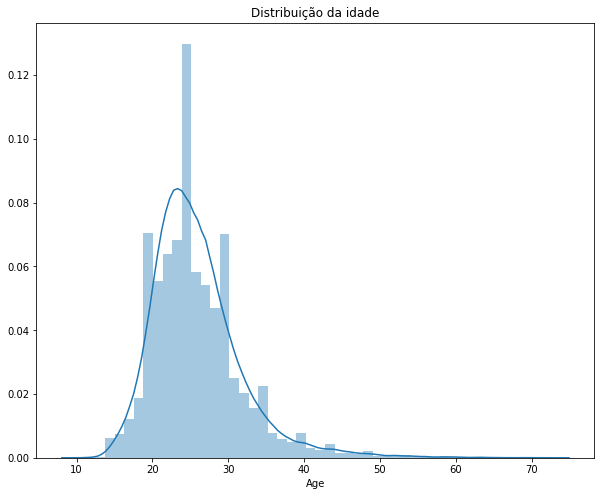

In [29]:
plt.figure(figsize=(10,8))
sns.distplot(df['Age'].dropna())
plt.title('Distribuição da idade')
plt.show()

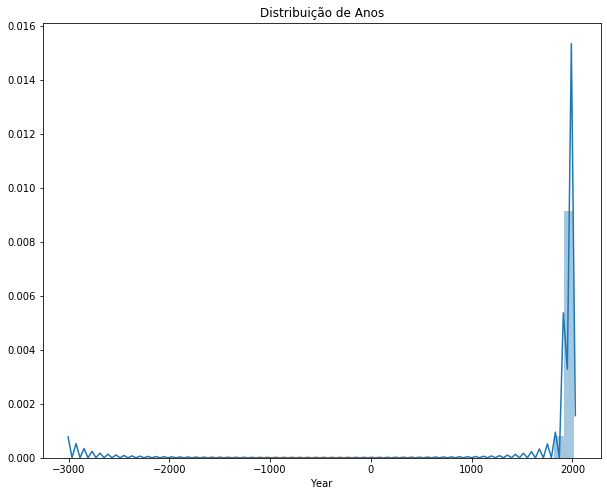

In [30]:
plt.figure(figsize=(10,8))
sns.distplot(df['Year'].dropna())
plt.title('Distribuição de Anos')
plt.show()

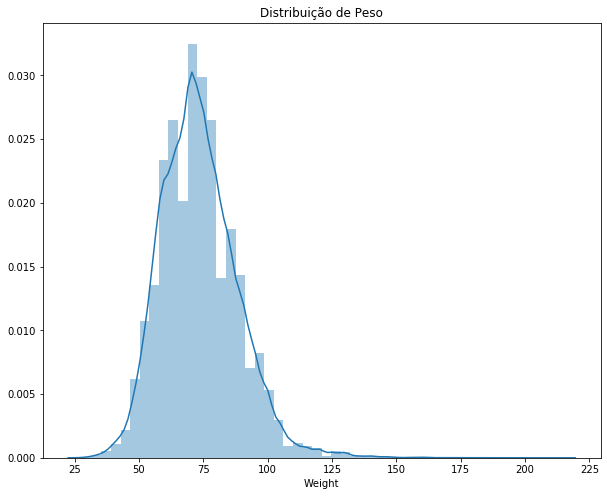

In [31]:
plt.figure(figsize=(10,8))
sns.distplot(df['Weight'].dropna())
plt.title('Distribuição de Peso')
plt.show()

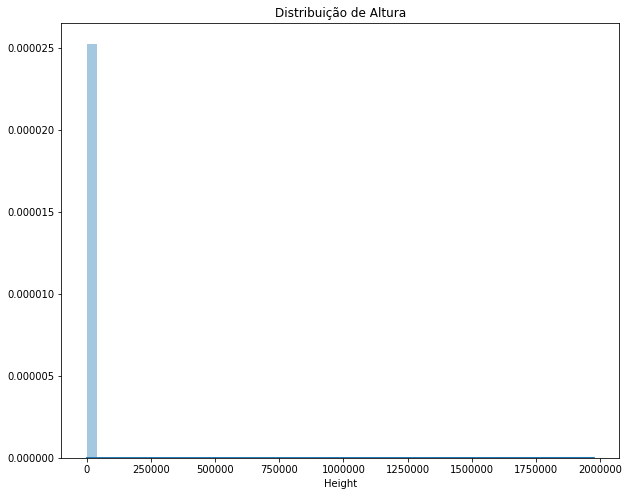

In [32]:
plt.figure(figsize=(10,8))
sns.distplot(df['Height'].dropna())
plt.title('Distribuição de Altura')
plt.show()

### Podemos perceber que os histogramas de Altura e de Anos estão distorcidos pela existência de outliers, temos de lidar com isso.

In [33]:
df = df[(df['Height']>0) & (df['Height']<280)]
df = df[(df['Year']>0) & (df['Year']<2023)]

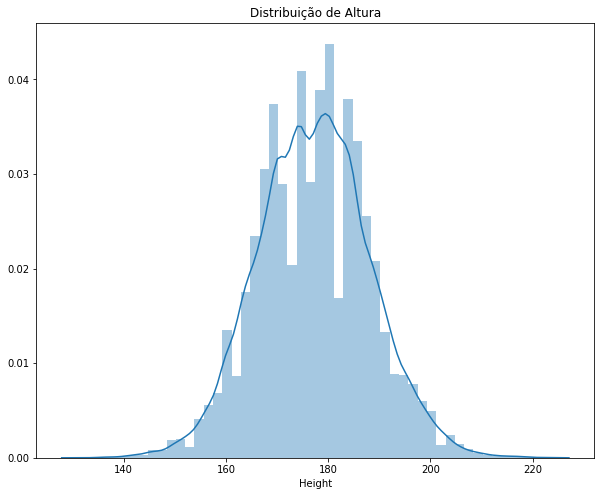

In [34]:
plt.figure(figsize=(10,8))
sns.distplot(df['Height'].dropna())
plt.title('Distribuição de Altura')
plt.show()

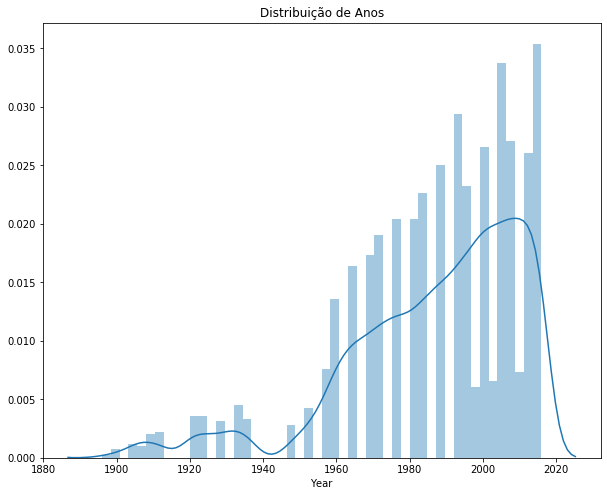

In [35]:
plt.figure(figsize=(10,8))
sns.distplot(df['Year'].dropna())
plt.title('Distribuição de Anos')
plt.show()

# Analisando os dados

## Primeiro, vamos descobrir quais são os três maiores medalhistas da história das olímpiadas e comparar as suas características com os outros atletas da base de dados

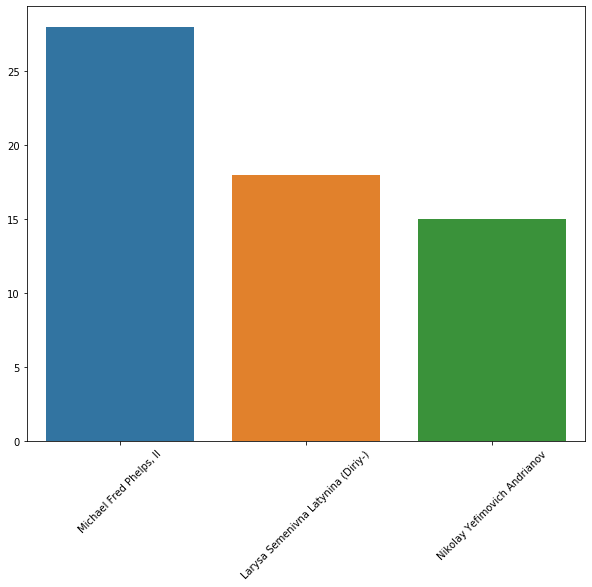

In [36]:
plt.figure(figsize=(10,8))
top_medalhistas = dict(df.dropna().Name.value_counts()[:3])
plt.xticks(rotation=45)
sns.barplot(x=list(top_medalhistas.keys()), y=list(top_medalhistas.values()))

### Agora vamos analisar as idades que esses medalhistas tinham quando ganharam suas medalhas

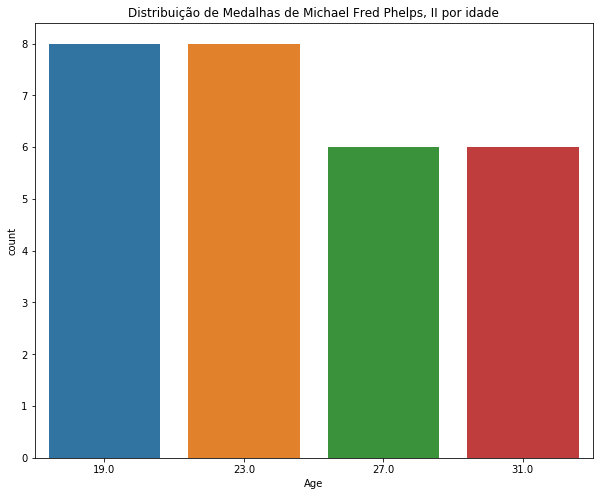

In [37]:
plt.figure(figsize=(10,8))
sns.countplot(df[df['Name']==list(top_medalhistas.keys())[0]]['Age'])
plt.title('Distribuição de Medalhas de ' + list(top_medalhistas.keys())[0]+' por idade')
plt.show()

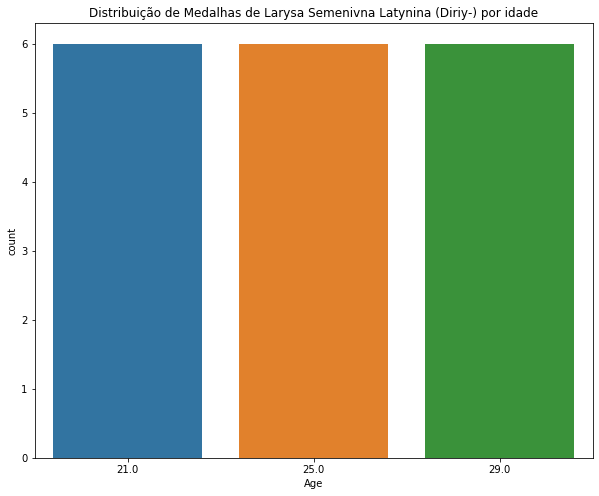

In [38]:
plt.figure(figsize=(10,8))
sns.countplot(df[df['Name']==list(top_medalhistas.keys())[1]]['Age'])
plt.title('Distribuição de Medalhas de ' + list(top_medalhistas.keys())[1]+' por idade')
plt.show()

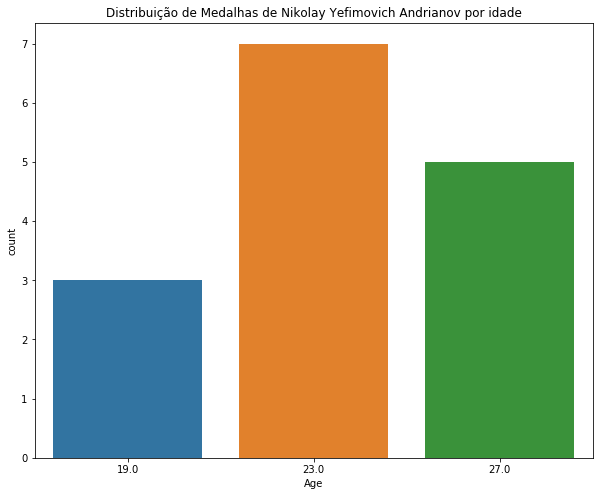

In [39]:
plt.figure(figsize=(10,8))
sns.countplot(df[df['Name']==list(top_medalhistas.keys())[2]]['Age'])
plt.title('Distribuição de Medalhas de ' + list(top_medalhistas.keys())[2]+' por idade')
plt.show()

### Vamos calcular a idade média do top 3 medalhistas e comparar com a distribuição de idades na base de dados.

In [40]:
ages_list = []
for i in list(top_medalhistas.keys()):
    ages_list.extend(list(df[df['Name']==i]['Age']))
sum(ages_list)/len(ages_list)

24.37704918032787

In [41]:
df['Age'].mean()

25.397365377563396

In [42]:
df['Age'].std()

5.166222382686439

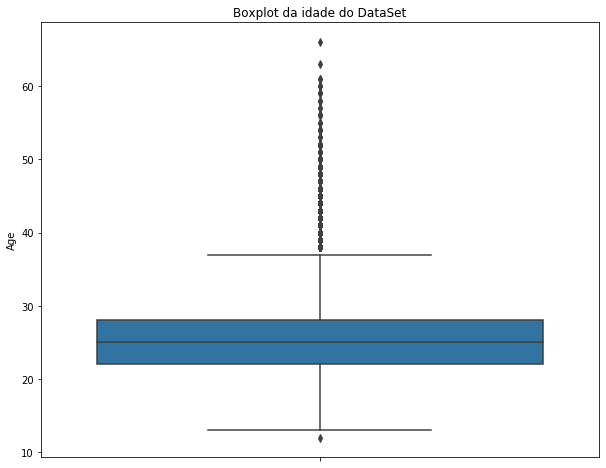

In [43]:
plt.figure(figsize=(10,8))
sns.boxplot(y=df['Age'])
plt.title('Boxplot da idade do DataSet')
plt.show()

### Sobre a idade, um ponto relevante é que ela não é um bom fator explicativo para determinar quem é ou não é medalhista dentro do conjunto de participantes das olímpiadas, visto que a média das idades dos maiores medalhistas e do conjunto total estão bem próximas.
###  Outra questão relevante é que tanto a idade dos participantes como um todo quanto dos maiores medalhistas se concentra em torno dos 20 anos. Isso provavelmente se deve a um viés de seleção anterior às olímpiadas em si, já que os países, ao selecionarem quem irá representá-los na competição, fazem um processo que busca selecionar os atletas de maior desempenho, assim, por uma questão biológica, atletas mais jovens tendem a ser favorecidos nesse processo.


## Agora, vamos analisar a distribuição de medalhas por países e anos. E, após isso, entender como as medalhas dos maiores países se distribuem entre as modalidades.

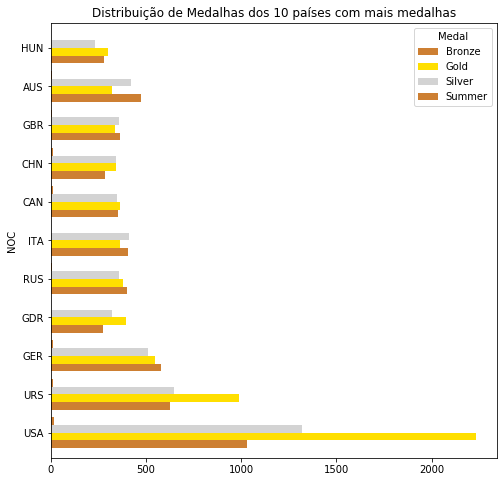

In [44]:
medals_country=df.groupby(['NOC','Medal'])['Sex'].count().reset_index().sort_values(by='Sex',ascending=False)
medals_country=medals_country.pivot('NOC','Medal','Sex').fillna(0)
top=medals_country.sort_values(by='Gold',ascending=False)[:11]
top.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'])
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.title('Distribuição de Medalhas dos 10 países com mais medalhas')
plt.show()

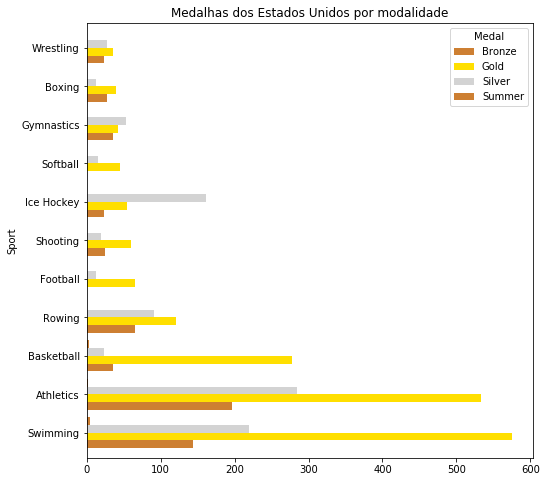

In [45]:
medals_country=df[df['NOC']=='USA'].groupby(['Sport','Medal'])['Sex'].count().reset_index().sort_values(by='Sex',ascending=False)
medals_country=medals_country.pivot('Sport','Medal','Sex').fillna(0)
top=medals_country.sort_values(by='Gold',ascending=False)[:11]
top.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'])
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.title('Medalhas dos Estados Unidos por modalidade')
plt.show()

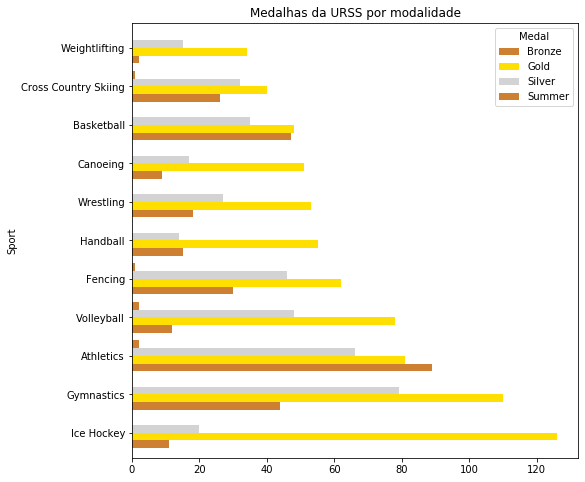

In [46]:
medals_country=df[df['NOC']=='URS'].groupby(['Sport','Medal'])['Sex'].count().reset_index().sort_values(by='Sex',ascending=False)
medals_country=medals_country.pivot('Sport','Medal','Sex').fillna(0)
top=medals_country.sort_values(by='Gold',ascending=False)[:11]
top.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'])
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.title('Medalhas da URSS por modalidade')
plt.show()

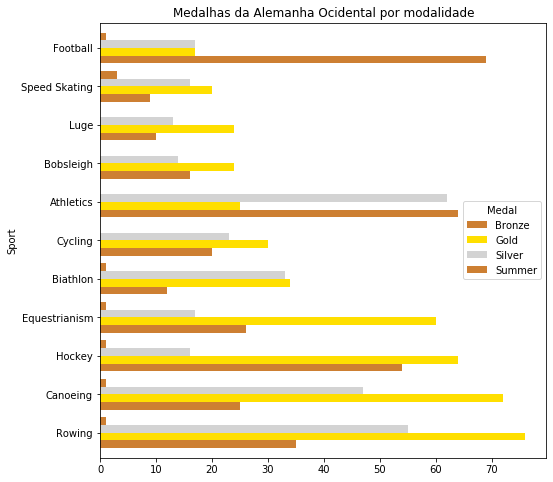

In [47]:
medals_country=df[df['NOC']=='GER'].groupby(['Sport','Medal'])['Sex'].count().reset_index().sort_values(by='Sex',ascending=False)
medals_country=medals_country.pivot('Sport','Medal','Sex').fillna(0)
top=medals_country.sort_values(by='Gold',ascending=False)[:11]
top.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'])
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.title('Medalhas da Alemanha Ocidental por modalidade')
plt.show()

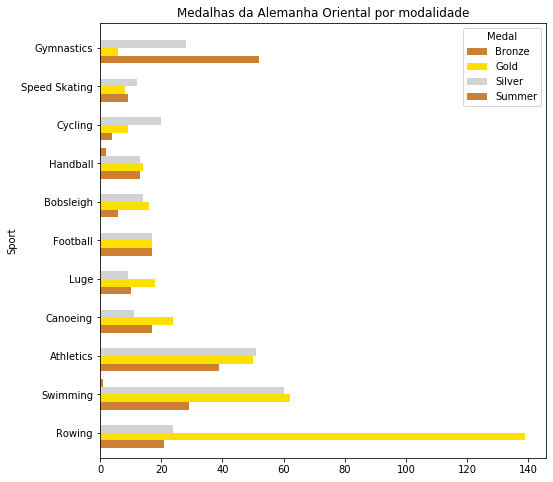

In [48]:
medals_country=df[df['NOC']=='GDR'].groupby(['Sport','Medal'])['Sex'].count().reset_index().sort_values(by='Sex',ascending=False)
medals_country=medals_country.pivot('Sport','Medal','Sex').fillna(0)
top=medals_country.sort_values(by='Gold',ascending=False)[:11]
top.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'])
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.title('Medalhas da Alemanha Oriental por modalidade')
plt.show()

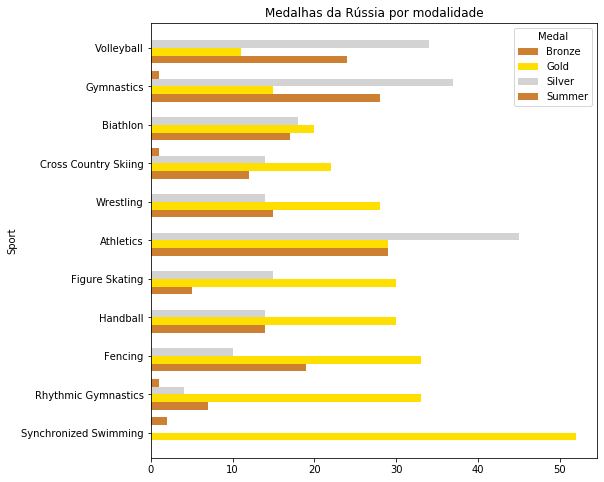

In [49]:
medals_country=df[df['NOC']=='RUS'].groupby(['Sport','Medal'])['Sex'].count().reset_index().sort_values(by='Sex',ascending=False)
medals_country=medals_country.pivot('Sport','Medal','Sex').fillna(0)
top=medals_country.sort_values(by='Gold',ascending=False)[:11]
top.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'])
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.title('Medalhas da Rússia por modalidade')
plt.show()

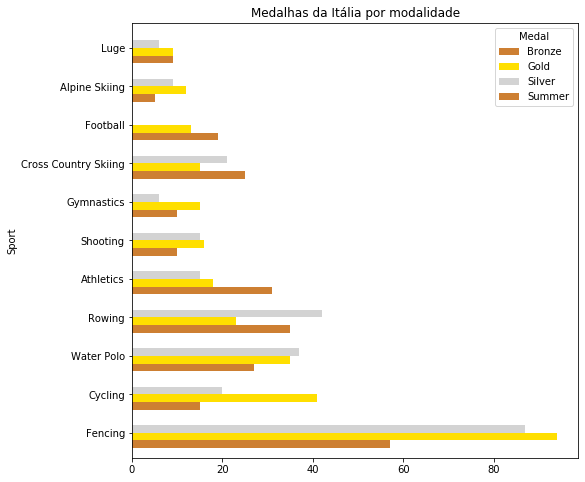

In [50]:
medals_country=df[df['NOC']=='ITA'].groupby(['Sport','Medal'])['Sex'].count().reset_index().sort_values(by='Sex',ascending=False)
medals_country=medals_country.pivot('Sport','Medal','Sex').fillna(0)
top=medals_country.sort_values(by='Gold',ascending=False)[:11]
top.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'])
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.title('Medalhas da Itália por modalidade')
plt.show()

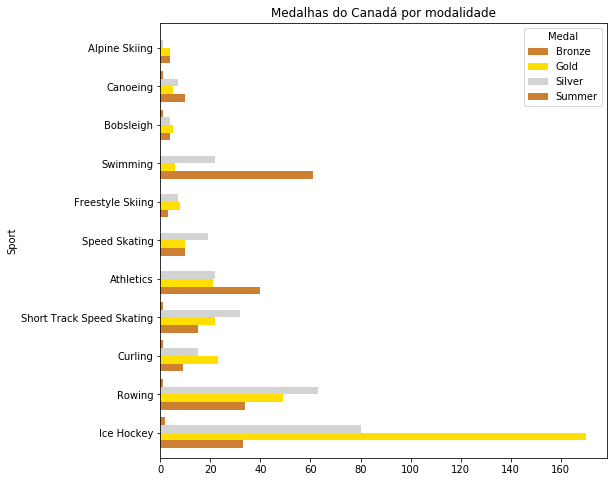

In [51]:
medals_country=df[df['NOC']=='CAN'].groupby(['Sport','Medal'])['Sex'].count().reset_index().sort_values(by='Sex',ascending=False)
medals_country=medals_country.pivot('Sport','Medal','Sex').fillna(0)
top=medals_country.sort_values(by='Gold',ascending=False)[:11]
top.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'])
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.title('Medalhas do Canadá por modalidade')
plt.show()

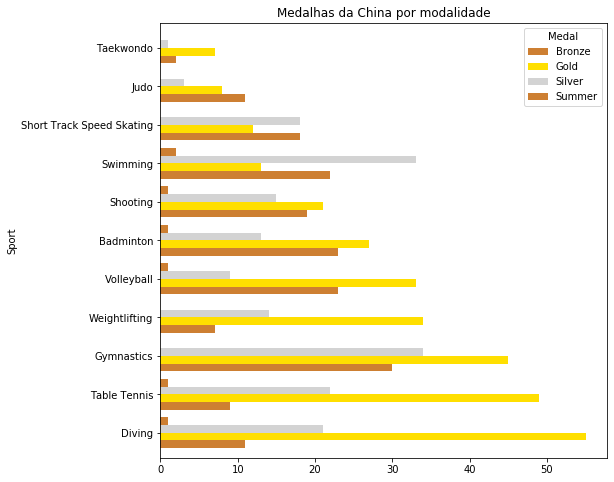

In [52]:
medals_country=df[df['NOC']=='CHN'].groupby(['Sport','Medal'])['Sex'].count().reset_index().sort_values(by='Sex',ascending=False)
medals_country=medals_country.pivot('Sport','Medal','Sex').fillna(0)
top=medals_country.sort_values(by='Gold',ascending=False)[:11]
top.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'])
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.title('Medalhas da China por modalidade')
plt.show()

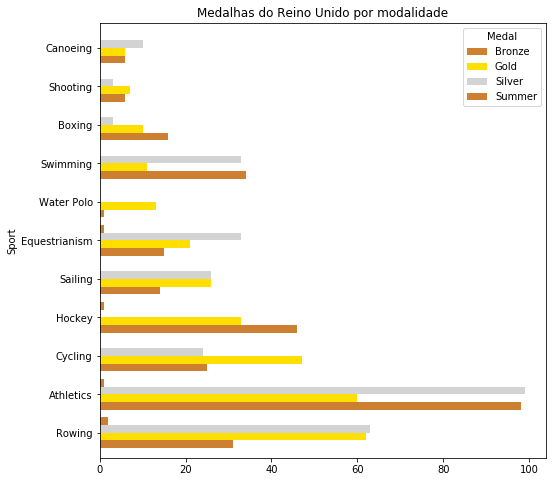

In [53]:
medals_country=df[df['NOC']=='GBR'].groupby(['Sport','Medal'])['Sex'].count().reset_index().sort_values(by='Sex',ascending=False)
medals_country=medals_country.pivot('Sport','Medal','Sex').fillna(0)
top=medals_country.sort_values(by='Gold',ascending=False)[:11]
top.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'])
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.title('Medalhas do Reino Unido por modalidade')
plt.show()

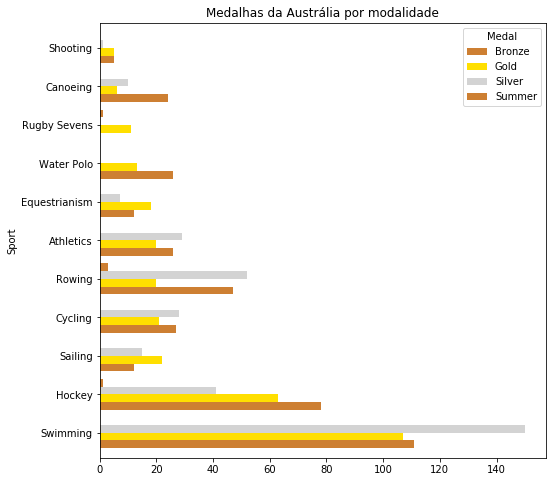

In [54]:
medals_country=df[df['NOC']=='AUS'].groupby(['Sport','Medal'])['Sex'].count().reset_index().sort_values(by='Sex',ascending=False)
medals_country=medals_country.pivot('Sport','Medal','Sex').fillna(0)
top=medals_country.sort_values(by='Gold',ascending=False)[:11]
top.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'])
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.title('Medalhas da Austrália por modalidade')
plt.show()

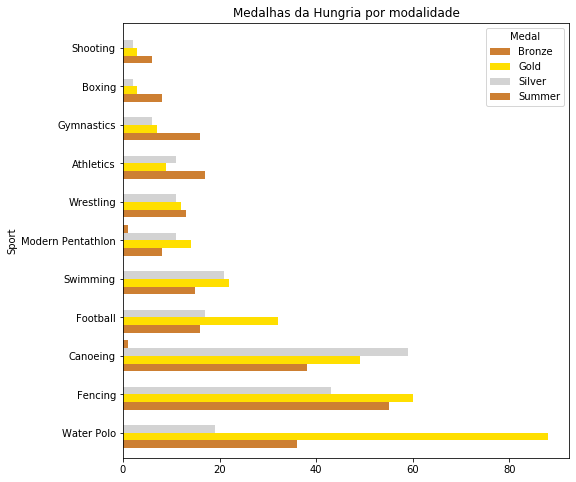

In [55]:
medals_country=df[df['NOC']=='HUN'].groupby(['Sport','Medal'])['Sex'].count().reset_index().sort_values(by='Sex',ascending=False)
medals_country=medals_country.pivot('Sport','Medal','Sex').fillna(0)
top=medals_country.sort_values(by='Gold',ascending=False)[:11]
top.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'])
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.title('Medalhas da Hungria por modalidade')
plt.show()

###  O primeiro ponto a ser observado aqui é que o quadro dos maiores medalhistas olímpicos de todo o DataSet reflete, em alguma medida, a conjuntura geopolítica do século XX. Os dados vão de 1896 até 2016, assim, grande parte deles está dentro deste recorte temporal. Sendo assim, historicamente, competições como as Olímpiadas e a Copa do Mundo foram utilizadas pelas grandes potências da época como uma forma de reafirmar sua dominância, isto é, de exercer <em> soft power </em>. No top 10 acima, vemos que os Estados Unidos e a União Soviética ocupam os dois primeiros lugares, refletindo a polarização que marcou o cenário internacional na segunda metade do século passado. Os outros lugares são ocupados por Estados que estavam, em alguma medida, sob a esfera de influência do bloco capitalista, liderados pelos EUA, ou do bloco comunista, liderados pela URSS. Isso é muito bem ilustrado pelo fato de que a Alemanha Ocidental e a Oriental, cada uma influenciada por uma esfera, ocupam, respectivamente, terceiro e quarto lugares no ranking geral de medalhas.

### Outro ponto a ser observado aqui é a respeito da distribuição entre modalidades das medalhas dos maiores países. Não há um único padrão, alguns países possuem alguma modalidade na qual grande parte de suas medalhas estão concentradas em uma ou duas modalidades, como é o caso do Canadá e o Hóquei no Gelo, já outros países possuem uma distribuição relativamente equânime entre as modalidades, como é o caso da Rússia.

## Agora, vamos analisar a distribuição de medalhas do Brasil ao longo do tempo e entre modalidades.

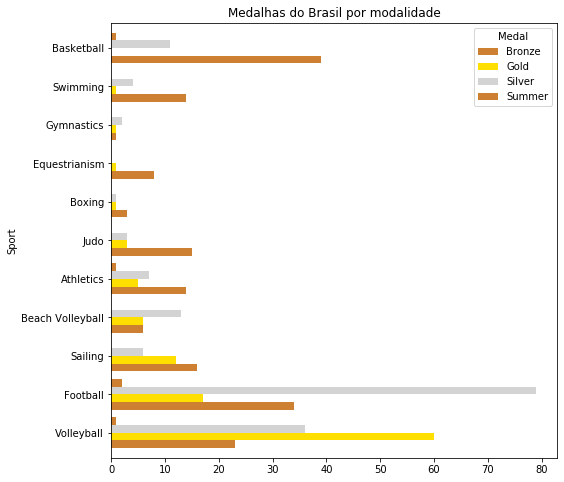

In [56]:
medals_country=df[df['NOC']=='BRA'].groupby(['Sport','Medal'])['Sex'].count().reset_index().sort_values(by='Sex',ascending=False)
medals_country=medals_country.pivot('Sport','Medal','Sex').fillna(0)
top=medals_country.sort_values(by='Gold',ascending=False)[:11]
top.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'])
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.title('Medalhas do Brasil por modalidade')
plt.show()

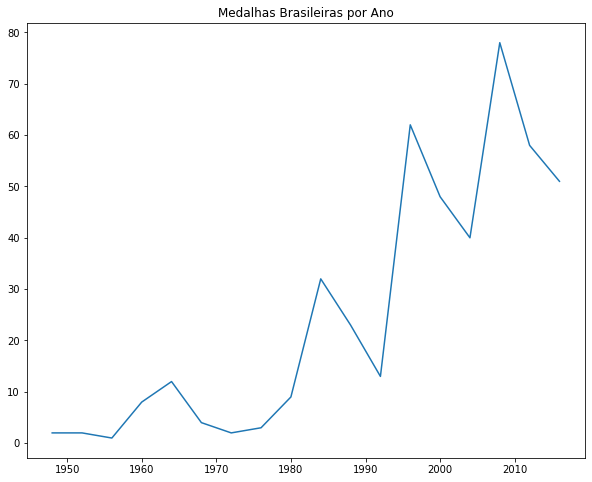

In [57]:
medals_year = dict(df[df['NOC']=='BRA'].dropna().Year.value_counts())
medals_year = collections.OrderedDict(sorted(medals_year.items()))
plt.figure(figsize=(10,8))
plt.title('Medalhas Brasileiras por Ano')
sns.lineplot(x=list(medals_year.keys()), y=list(medals_year.values()))

### Primeiro, em se tratando da distribuição de modalidades, o Brasil tem suas medalhas concentradas em duas modalidades: Futebol e Vôlei, o que faz sentido tendo em vista o fato de que estes dois esportes são os mais praticados no país. 
### Segundo, em se tratando da distribuição temporal das medalhas, é interessante notar o salto no número de medalhas a partir dos anos 90 e 2000, o que provavelmente é reflexo das políticas públicas de incentivo ao esporte elaboradas e implementadas durante esse período

# Conclusão

## Após realizarmos a limpeza dos dados e algumas análises exploratórias, chegamos às seguintes conclusões:
<ul>
<li>Os três maiores medalhistas são, respectivamente: Michael Phelps, Larisa Latynina e Nikolai Andrianov</li>
<li>A idade não é um bom fator explicativo para determinar o número de medalhas dos participantes das olímpiadas</li>
<li>A distribuição de medalhas entre países também reflete a configuração geopolítica do mundo.</li>
<li>As medalhas de um país, em geral, são distrbuídas entre modalidades da seguinte maneira: Equânime ou com concentração em 1/2 modalidades</li>
<li>As medalhas do Brasil estão concentradas em duas modalidades: Futebol e Volêi, o que reflete a popularidade dos esportes no país.</li>
</ul>